In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [9]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ~/scratch/kin_sr_microarray.vcf.gz \
    --threads 20 \
    --maf 0.1 \
    --allow-extra-chr \
    --geno 0.9 \
    --make-king-table \
    --out ~/scratch/kin_sr_all

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /storage/home/nsl5160/scratch/kin_sr_all.log.
Options in effect:
  --allow-extra-chr
  --geno 0.9
  --maf 0.1
  --make-king-table
  --out /storage/home/nsl5160/scratch/kin_sr_all
  --threads 20
  --vcf /storage/home/nsl5160/scratch/kin_sr_microarray.vcf.gz

Start time: Fri Jan 26 14:19:07 2024
257826 MiB RAM detected; reserving 128913 MiB for main workspace.
Using up to 20 threads (change this with --threads).
--vcf: 19723 variants scanned.
--vcf: /storage/home/nsl5160/scratch/kin_sr_all-temporary.pgen +
/storage/home/nsl5160/scratch/kin_sr_all-temporary.pvar +
/storage/home/nsl5160/scratch/kin_sr_all-temporary.psam written.

In [2]:
galaxy = pd.read_csv("../galaxy_metadata.txt", sep = "\t")
related = pd.read_csv("/storage/home/nsl5160/scratch/kin_sr_all.kin0", sep = "\t")
metadata = pd.read_csv("../filtered_DARPA_metadata.csv")
for i in ["#ID1", "ID2"]:
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20148.bam", i] = "A20148"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20151.bam", i] = "A20151"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20153.bam", i] = "A20153"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20154.bam", i] = "A20154"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20155.bam", i] = "A20155"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20156.bam", i] = "A20156"

In [8]:
galaxy = pd.read_csv("../galaxy_metadata.txt", sep = "\t")
related = pd.read_csv("/storage/home/nsl5160/scratch/kin_sr_all.kin0", sep = "\t")
metadata = pd.read_csv("../2024_01_12_PsuData.csv")
for i in ["#ID1", "ID2"]:
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20148.bam", i] = "A20148"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20151.bam", i] = "A20151"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20153.bam", i] = "A20153"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20154.bam", i] = "A20154"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20155.bam", i] = "A20155"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20156.bam", i] = "A20156"

In [9]:
metadata["Best Galaxy Match"] = np.nan
metadata["Best Galaxy Match KING Coefficient"] = np.nan
metadata["Best Galaxy Match User ID"] = np.nan
metadata["Best Galaxy Match Reef Name"] = np.nan
metadata["Best Galaxy Match Clonal ID"] = np.nan

In [10]:
for i in range(len(metadata)):
    try:
        match = (related[(related["#ID1"] == metadata["Novogene_ID"][i]) | (related["ID2"] == metadata["Novogene_ID"][i])]
         [(related["#ID1"].str.contains("CEL")) | (related["ID2"].str.contains("CEL"))]
         .sort_values("KINSHIP").tail(1).reset_index(drop=True))

        metadata["Best Galaxy Match KING Coefficient"][i] = match["KINSHIP"][0]
        if "CEL" in match["#ID1"][0]:
            metadata["Best Galaxy Match"][i] = match["#ID1"][0]
            metadata["Best Galaxy Match User ID"][i] = (galaxy['User Specimen ID'][galaxy["Affymetrix ID"] == 
                match["#ID1"][0]].reset_index(drop=True)[0])
            metadata["Best Galaxy Match Reef Name"][i] = (galaxy["Reef Name"][galaxy["Affymetrix ID"] == 
                match["#ID1"][0]].reset_index(drop=True)[0])
            metadata["Best Galaxy Match Clonal ID"][i] = (galaxy["Coral Mlg Clonal ID"][galaxy["Affymetrix ID"] == 
                match["#ID1"][0]].reset_index(drop=True)[0])
        else:
            metadata["Best Galaxy Match"][i] = match["ID2"][0]
            metadata["Best Galaxy Match User ID"][i] = (galaxy['User Specimen ID'][galaxy["Affymetrix ID"] == 
                match["ID2"][0]].reset_index(drop=True)[0])
            metadata["Best Galaxy Match Reef Name"][i] = (galaxy["Reef Name"][galaxy["Affymetrix ID"] == 
                match["ID2"][0]].reset_index(drop=True)[0])
            metadata["Best Galaxy Match Clonal ID"][i] = (galaxy["Coral Mlg Clonal ID"][galaxy["Affymetrix ID"] == 
                match["ID2"][0]].reset_index(drop=True)[0])
    except:
        pass

/tmp/ipykernel_3052860/3638734326.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  match = (related[(related["#ID1"] == metadata["Novogene_ID"][i]) | (related["ID2"] == metadata["Novogene_ID"][i])]
/tmp/ipykernel_3052860/3638734326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["Best Galaxy Match KING Coefficient"][i] = match["KINSHIP"][0]
/tmp/ipykernel_3052860/3638734326.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["Best Galaxy Match"][i] = match["ID2"][0]
/tmp/ipykernel_3052860/3638734326.py:18: SettingWithCopyWarning: 
A value is trying to be set on 

In [13]:
metadata2 = metadata[['cbassRun', 'species', 'genetNumber', 'Novogene_ID', 'geno',
       'presumed_geno', 'name', 'year', 'nursery', 'ed50', 'stdError',
       'nurseRes', 'ed50Adj', 'temperature', 'logSh', 'dom',
       'Best Galaxy Match', 'Best Galaxy Match KING Coefficient',
       'Best Galaxy Match User ID', 'Best Galaxy Match Reef Name',
       'Best Galaxy Match Clonal ID']]

In [17]:
metadata2["Questionable?"] = "No"
metadata2.loc[metadata["presumed_geno"] != metadata["Best Galaxy Match Clonal ID"], "Questionable?"] = "Yes"
metadata2.loc[metadata["presumed_geno"].isna(), "Questionable?"] = "No"
metadata2.loc[metadata["Novogene_ID"].isna(), "Questionable?"] = "No"

In [21]:
metadata2.set_index("genetNumber").to_csv("../2024_01_12_PsuData_fixed.csv")

We did a bit of correction outside of Jupyter to see if we can fix mixed up IDs. It looks like some samples may have been swapped during subsetting or during DNA extraction. Phenotype labels here should be correct if we just swap the labels back. So here we do that:

In [199]:
metadata = pd.read_csv("../2024_01_12_PsuData_fixed.csv")
metadata = metadata[metadata["year"] == 2022].reset_index(drop=False)

In [206]:
pairwise_crf_um = pd.DataFrame()
pairwise_rr_um = pd.DataFrame()
pairwise_crf_rr = pd.DataFrame()
pairwise_crf_crf = pd.DataFrame()
pairwise_rr_rr = pd.DataFrame()
pairwise_um_um = pd.DataFrame()
for i in metadata["presumed_geno"][metadata["presumed_geno"].notna()].unique():
    tmp = metadata[["index", "presumed_geno", "nursery", "ed50"]][metadata["presumed_geno"] == i]
    try:
        crf = pd.DataFrame()
        crf = tmp[tmp["nursery"] == "CRF"].sample(1).reset_index(drop=True)
    except:
        pass
    try:
        rr = pd.DataFrame()
        rr = tmp[tmp["nursery"] == "RR"].sample(1).reset_index(drop=True)
    except:
        pass
    try:
        um = pd.DataFrame()
        um = tmp[tmp["nursery"] == "UM"].sample(1).reset_index(drop=True)
    except:
        pass
    if len(crf) and len(rr) == 1:
        tmp1 = pd.DataFrame(data = [[rr["presumed_geno"][0], 
                      rr["index"][0],
                      crf["index"][0],
                      rr["ed50"][0],
                      crf["ed50"][0]]], 
             columns = ["presumed_geno", "RR Index", "CRF Index", "RR ED50", "CRF ED50"])
        pairwise_crf_rr = pd.concat([pairwise_crf_rr, tmp1]).reset_index(drop=True)
        pairwise_crf_rr["difference"] = abs(pairwise_crf_rr["CRF ED50"] - pairwise_crf_rr["RR ED50"])
    if len(crf) and len(um) == 1:
        tmp1 = pd.DataFrame(data = [[um["presumed_geno"][0], 
                      um["index"][0],
                      crf["index"][0],
                      um["ed50"][0],
                      crf["ed50"][0]]], 
             columns = ["presumed_geno", "UM Index", "CRF Index", "UM ED50", "CRF ED50"])
        pairwise_crf_um = pd.concat([pairwise_crf_um, tmp1]).reset_index(drop=True)
        pairwise_crf_um["difference"] = abs(pairwise_crf_um["CRF ED50"] - pairwise_crf_um["UM ED50"])
    if len(rr) and len(um) == 1:
        tmp1 = pd.DataFrame(data = [[rr["presumed_geno"][0], 
                      rr["index"][0],
                      um["index"][0],
                      rr["ed50"][0],
                      um["ed50"][0]]], 
             columns = ["presumed_geno", "RR Index", "UM Index", "RR ED50", "UM ED50"])
        pairwise_rr_um = pd.concat([pairwise_rr_um, tmp1]).reset_index(drop=True)
        pairwise_rr_um["difference"] = abs(pairwise_rr_um["RR ED50"] - pairwise_rr_um["UM ED50"])
    crf = tmp[tmp["nursery"] == "CRF"].reset_index(drop=True)
    crf = crf.sample(frac = 1).reset_index(drop=True)
    rr = tmp[tmp["nursery"] == "RR"].reset_index(drop=True)
    rr = rr.sample(frac = 1).reset_index(drop=True)
    um = tmp[tmp["nursery"] == "UM"].reset_index(drop=True)
    um = um.sample(frac = 1).reset_index(drop=True)
    if len(crf) == 2:
        samp1 = crf.head(1).reset_index(drop=True)
        samp2 = crf.tail(1).reset_index(drop=True)
        tmp1 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp1["index"][0],
                      samp2["index"][0],
                      samp1["ed50"][0],
                      samp2["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp1]).reset_index(drop=True)
        pairwise_crf_crf["difference"] = abs(pairwise_crf_crf["samp1 ED50"] - pairwise_crf_crf["samp2 ED50"])
    if len(crf) == 3:
        samp1 = crf.head(1).reset_index(drop=True)
        samp2 = crf.head(2).tail(1).reset_index(drop=True)
        samp3 = crf.tail(1).reset_index(drop=True)
        tmp1 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp1["index"][0],
                      samp2["index"][0],
                      samp1["ed50"][0],
                      samp2["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        tmp2 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp1["index"][0],
                      samp3["index"][0],
                      samp1["ed50"][0],
                      samp3["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        tmp3 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp2["index"][0],
                      samp3["index"][0],
                      samp2["ed50"][0],
                      samp3["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp1]).reset_index(drop=True)
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp2]).reset_index(drop=True)
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp3]).reset_index(drop=True)
        pairwise_crf_crf["difference"] = abs(pairwise_crf_crf["samp1 ED50"] - pairwise_crf_crf["samp2 ED50"])
    if len(crf) == 3:
        samp1 = crf.head(1).reset_index(drop=True)
        samp2 = crf.head(2).tail(1).reset_index(drop=True)
        samp3 = crf.head(3).tail(1).reset_index(drop=True)
        samp4 = crf.tail(1).reset_index(drop=True)
        tmp1 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp1["index"][0],
                      samp2["index"][0],
                      samp1["ed50"][0],
                      samp2["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        tmp2 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp1["index"][0],
                      samp3["index"][0],
                      samp1["ed50"][0],
                      samp3["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        tmp3 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp2["index"][0],
                      samp3["index"][0],
                      samp2["ed50"][0],
                      samp3["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        tmp4 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp1["index"][0],
                      samp4["index"][0],
                      samp1["ed50"][0],
                      samp4["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        tmp5 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp2["index"][0],
                      samp4["index"][0],
                      samp2["ed50"][0],
                      samp4["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        tmp6 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp3["index"][0],
                      samp4["index"][0],
                      samp3["ed50"][0],
                      samp4["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp1]).reset_index(drop=True)
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp2]).reset_index(drop=True)
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp3]).reset_index(drop=True)
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp4]).reset_index(drop=True)
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp5]).reset_index(drop=True)
        pairwise_crf_crf = pd.concat([pairwise_crf_crf, tmp6]).reset_index(drop=True)
        pairwise_crf_crf["difference"] = pairwise_crf_crf["samp1 ED50"] - pairwise_crf_crf["samp2 ED50"]
    if len(rr) == 2:
        rr = rr.sample(2).reset_index(drop=True)
        samp1 = rr.head(1).reset_index(drop=True)
        samp2 = rr.tail(1).reset_index(drop=True)
        tmp1 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp1["index"][0],
                      samp2["index"][0],
                      samp1["ed50"][0],
                      samp2["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        pairwise_rr_rr = pd.concat([pairwise_rr_rr, tmp1]).reset_index(drop=True)
        pairwise_rr_rr["difference"] = pairwise_rr_rr["samp1 ED50"] - pairwise_rr_rr["samp2 ED50"]
    if len(um) == 2:
        um = um.sample(2).reset_index(drop=True)
        samp1 = um.head(1).reset_index(drop=True)
        samp2 = um.tail(1).reset_index(drop=True)
        tmp1 = pd.DataFrame(data = [[samp1["presumed_geno"][0], 
                      samp1["index"][0],
                      samp2["index"][0],
                      samp1["ed50"][0],
                      samp2["ed50"][0]]], 
             columns = ["presumed_geno", "Index 1", "Index 2", "samp1 ED50", "samp2 ED50"])
        pairwise_um_um = pd.concat([pairwise_um_um, tmp1]).reset_index(drop=True)
        pairwise_um_um["difference"] = pairwise_um_um["samp1 ED50"] - pairwise_um_um["samp2 ED50"]

In [207]:
withinnursery = pd.concat([pairwise_um_um, 
                                  pairwise_crf_crf, 
                                  pairwise_rr_rr]).reset_index(drop=True).drop_duplicates().reset_index(drop=True)

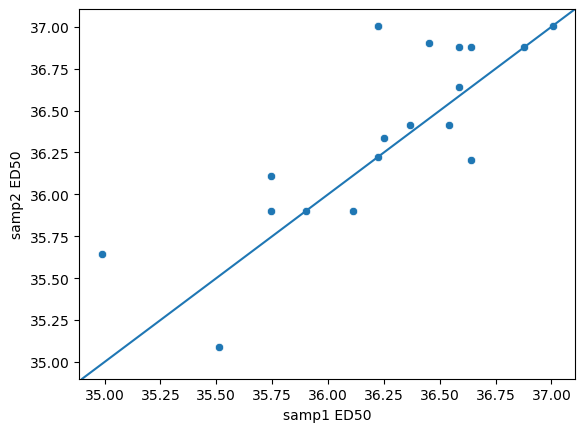

In [209]:
sns.scatterplot(data = withinnursery, x = "samp1 ED50", y = "samp2 ED50")
plt.axline((35, 35), slope=1, color='C0', label='by slope')

In [81]:
metadata = pd.read_csv("../filtered_DARPA_metadata_fixed.csv")

In [82]:
metadata = metadata[["SampleProviderTubeID", "FixedTubeID", "Novogene_ID", 'Best Galaxy Match Clonal ID', 'Best Galaxy Match KING Coefficient', "SampleProvider"]]

In [83]:
metadata.columns = ["genetNumberOld", "genetNumber", "Novogene_ID", 'Clonal ID', "KING", "provider"]

In [84]:
richfixed = metadata[metadata["genetNumber"].notna()][metadata["provider"] == "Rich"]
richfixed["genetNumber"] = richfixed["genetNumber"].astype(int)

/tmp/ipykernel_4022049/3014967151.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  richfixed = metadata[metadata["genetNumber"].notna()][metadata["provider"] == "Rich"]


In [85]:
ed5 = pd.read_csv("../ed5.csv")
richphenos = pd.read_csv("../updated_metadata_rich_with_clonal_id.csv")

In [86]:
richphenos = richphenos.merge(ed5[["genetNumber", "ed5"]], how = "left", on = "genetNumber")

In [87]:
richphenos = richphenos[["FixedTubeID", "nursery", "ed50", "ed5", "logSh", "clonal_id_correct"]]
richphenos.columns = ["genetNumber", "nursery", "ed50", "ed5", "logSh", "clonal_id_correct"]

In [88]:
richfixed = richfixed.merge(richphenos, how = "left", on = "genetNumber")

In [89]:
richfixed = richfixed.sort_values(["Clonal ID", "nursery"]).drop_duplicates("Clonal ID")

In [90]:
needcorrecting = metadata[metadata["provider"] != "Rich"]
needcorrecting = needcorrecting[["Novogene_ID", "Clonal ID", "KING"]]
needcorrecting.columns = ["Novogene_ID", "clonal_id_correct", "KING"]

In [91]:
phenos = richphenos.sort_values(["clonal_id_correct", "nursery"]).drop_duplicates("clonal_id_correct")
phenos = phenos[phenos["clonal_id_correct"].notna()].reset_index(drop=True)

In [92]:
needcorrecting = needcorrecting.merge(phenos, how = "left", on = "clonal_id_correct")

In [93]:
needcorrecting = needcorrecting[needcorrecting["ed50"].notna()][needcorrecting["clonal_id_correct"].notna()]
needcorrecting.columns = ['Novogene_ID', 'Clonal ID', 'KING', 'genetNumber', 'nursery',
       'ed50', 'ed5', 'logSh']

/tmp/ipykernel_4022049/2795000460.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  needcorrecting = needcorrecting[needcorrecting["ed50"].notna()][needcorrecting["clonal_id_correct"].notna()]


In [94]:
final = pd.concat([richfixed, needcorrecting]).reset_index(drop=True)

In [95]:
final = final.sort_values(["Clonal ID", "nursery"]).drop_duplicates("Clonal ID").reset_index(drop=True)

In [121]:
metadata = pd.read_csv("../filtered_DARPA_metadata_fixed.csv")

In [122]:
relatedness = pd.read_csv("plink2.king.cutoff.in.id", sep = "\t")
relatedness = relatedness[~relatedness["#IID"].str.contains("storage")]
relatedness.columns = ["Novogene_ID"]

In [123]:
relatedness = relatedness.merge(metadata, how = "left", on = "Novogene_ID")

In [124]:
relatedness = relatedness[~relatedness["Region"].isin(["Middle Keys", "Upper Keys", "Lower Keys", "Florida", "USA: Florida", "Dry Tortugas"])]

In [125]:
samples = metadata[metadata["Novogene_ID"].isin(final["Novogene_ID"].tolist() + relatedness["Novogene_ID"].tolist())]

In [436]:
samples[["Novogene_ID"]][samples["SeqType"] != "PacBio HiFi"].set_index("Novogene_ID").to_csv("../pop_covar_list.txt", header = None)

In [437]:
samples[["Novogene_ID", "Region"]][samples["SeqType"] != "PacBio HiFi"].set_index("Novogene_ID").to_csv("../pop_covar_popmap.txt", header = None, sep = "\t")

In [438]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 1.0 --min-alleles 2 --max-alleles 2 \
    --maf 0.05 --thin 20000 --keep ../pop_covar_list.txt \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../plink_pca_input

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz
	--keep ../pop_covar_list.txt
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--min-alleles 2
	--minGQ 20
	--thin 20000
	--minQ 20
	--max-missing 1
	--out ../plink_pca_input
	--recode
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 129 out of 182 Individuals
Outputting VCF file...
	Read 218633 BED file entries.
After filtering, kept 11413 out of a possible 11236881 Sites
Run Time = 1838.00 seconds


In [119]:
%%bash
source ~/.bashrc
conda activate ipyrad
bcftools query -l ../plink_pca_input.recode.vcf | wc -l

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
129


In [439]:
task = "plink2_pca"
mem = "256"
cpus = "20"
infile = "../plink_pca_input.recode.vcf"
outpath = "../plink_pca"
prefix = "pca_full"
maf = str(0.05)
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     infile + " " + outpath + " " + prefix + " " + maf], shell=True)

Submitted batch job 8451033


CompletedProcess(args=['sbatch --mem=256g --ntasks=20 ../plink2_pca.sh ../plink_pca_input.recode.vcf ../plink_pca pca_full 0.05'], returncode=0)

Text(0, 0.5, 'PC2 (3.91898%)')

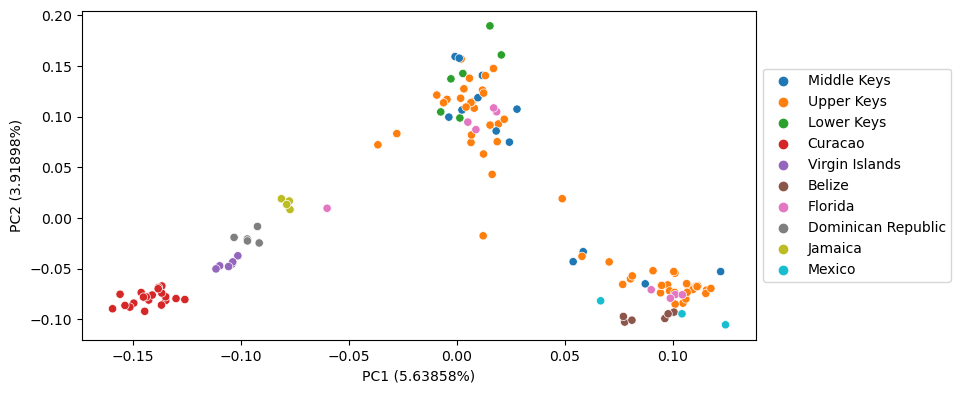

In [129]:
import seaborn as sns
from matplotlib import rcParams
eigenvar = pd.read_csv("../plink_pca/pca_full.eigenval", sep = "\t", header = None)

# figure size in inches
rcParams['figure.figsize'] = 8.7,4.27

pca = pd.read_csv("../plink_pca/pca_full.eigenvec", sep = "\t")

metadata = pd.read_csv("../pop_covar_popmap.txt", sep = "\t")
metadata.columns = ["#IID", "Region"]
pca = pca.merge(metadata, how = "left", on = "#IID")
sns.scatterplot(data = pca, x = "PC1", y = "PC2", hue = "Region")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("PC1 (" + str(eigenvar[0][0]) + "%)")
plt.ylabel("PC2 (" + str(eigenvar[0][1]) + "%)")
#plt.savefig("../WGS_popgen.png", dpi = 300, bbox_inches='tight')

In [130]:
pca_covar = pca[["#IID", "PC1", "PC2", "PC3"]]
pca_covar.columns = ["Novogene_ID", "PC1", "PC2", "PC3"]

In [132]:
final = final.merge(pca_covar, how = "left", on = "Novogene_ID")

In [136]:
final = final[final["PC1"].notna()]

In [138]:
phenos = final[["Novogene_ID", "ed50", "ed5", "logSh"]]
covars = final[["Novogene_ID", "nursery", "PC1", "PC2", "PC3"]]

In [140]:
phenos.columns = ["#IID", "ED50", "ED5", "logSh"]
covars.columns = ["#IID", "nursery", "PC1", "PC2", "PC3"]

In [145]:
phenos = phenos.fillna("NA")
covars["nursery"] = covars["nursery"].fillna("NONE")
covars = covars.fillna("NA")

/tmp/ipykernel_4022049/971278299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covars["nursery"] = covars["nursery"].fillna("NONE")


In [146]:
phenos[["#IID", "ED50", "logSh"]].set_index("#IID").to_csv("../phenotypes_final.pheno", sep = "\t")
covars[["#IID", "nursery", "PC1", "PC2", "PC3"]].set_index("#IID").to_csv("../covars_final.covar", sep = "\t")

For GWAS, people often filter for HWE and excess heterozygosity departures. However, our Florida population is stratified, which makes this difficult. Here, I'll use PCAngsd to perform stratified tests for HWE departure that takes into account genotype uncertainty:

In [ ]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools annotate \
    ../calls/apal_imputation_panel_hifi_illumina.vcf.gz --remove "INFO" \
    | bcftools view --samples-file ../pop_covar_list.txt \
    -e 'COUNT(GT="AA")=N_SAMPLES || COUNT(GT="RR")=N_SAMPLES' \
    --targets-file ^../references/repeats.sorted.bed \
    | bcftools annotate --remove "INFO" | bcftools +fill-tags -- -t all \
    | bcftools view -O v > ~/scratch/HWE_in.vcf

In [161]:
%%bash
cat ../hwe_filter.sh ; sbatch ../hwe_filter.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=pcangfilt
#SBATCH --ntasks=20
#SBATCH --mem=256Gb
#SBATCH --account=open

source ~/.bashrc
conda activate ipyrad

perl /storage/group/ibb3/default/darpa/vcf2Beagle.pl --in=/storage/home/nsl5160/scratch/HWE_in.vcf \
    --out=/storage/home/nsl5160/scratch/HWE_in_beagle.GL --PL

gzip /storage/home/nsl5160/scratch/HWE_in_beagle.GL

conda activate pcangsd
cd /storage/home/nsl5160/scratch/
pcangsd --beagle HWE_in_beagle.GL.gz \
    -t 20 --inbreedSites \
    --sites_save -o HWE_filter
Submitted batch job 8651345


In [ ]:
!cd ~/scratch ; zcat ./HWE_in_beagle.GL.gz | cut -f1-3 > ./HWE_in_beagle.sites

In [2]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sns

In [34]:
lrt = np.load("/storage/home/nsl5160/scratch/HWE_filter.lrt.sites.npy")
inbreed = np.load("/storage/home/nsl5160/scratch/HWE_filter.inbreed.sites.npy")
pval = 1 - scipy.stats.chi2.cdf(lrt, df = 1)
pval = pd.DataFrame(pval, columns = ["hwe_pval"])
sites = pd.read_csv("/storage/home/nsl5160/scratch/HWE_in_beagle.sites", sep = ' ')
sitemask = pd.read_csv("/storage/home/nsl5160/scratch/HWE_filter.sites", header = None, names = ["mask"])
sites = pd.concat([sites, sitemask], axis = 1)
maffiltered = sites[sites["mask"] == 1].reset_index(drop=True)
maffiltered = pd.concat([maffiltered, pval], axis = 1)
maffiltered = maffiltered[maffiltered["hwe_pval"] > 0.000001]
maffiltered["Type"] = "SNP"
maffiltered.loc[maffiltered["alleleB"].str.len() > 1, "Type"] = "Insertion"
maffiltered.loc[maffiltered["alleleA"].str.len() > 1, "Type"] = "Deletion"
positions = maffiltered["marker"].str.split(":", expand = True)
positions.columns = ["CHROM", "POS"]

In [76]:
positions.set_index("CHROM").to_csv("../maf_hwe_filtered.tsv", sep = "\t", header = None)

In [79]:
%%bash
source ~/.bashrc
conda activate ipyrad
#bgzip ~/scratch/HWE_in.vcf
#tabix ~/scratch/HWE_in.vcf.gz
bcftools view ~/scratch/HWE_in.vcf.gz --targets-file ../maf_hwe_filtered.tsv \
    -O z > ../calls/gwas_dataset_expanded.vcf.gz
tabix ../calls/gwas_dataset_expanded.vcf.gz

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [ ]:
%%bash
source ~/.bashrc
conda activate ipyrad
bcftools query -l ../calls/impute_dataset_imputed.vcf.gz \
    > ../imputed_sample_list.txt

In [164]:
psumeta = pd.read_csv("../2023-03-21_psuMeta.csv")
galaxy = pd.read_csv("../galaxy_metadata.txt", sep = "\t")
related = pd.read_csv("/storage/home/nsl5160/scratch/kin_sr_microarray.kin0", sep = "\t")
metadata = pd.read_csv("../filtered_DARPA_metadata_fixed.csv")
for i in ["#ID1", "ID2"]:
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20148.bam", i] = "A20148"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20151.bam", i] = "A20151"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20153.bam", i] = "A20153"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20154.bam", i] = "A20154"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20155.bam", i] = "A20155"
    related.loc[related[i] == "/storage/home/nsl5160/scratch/darpa/mapped/20156.bam", i] = "A20156"

In [165]:
update = metadata[["SampleProviderTubeID", "Best Galaxy Match Clonal ID"]]
update.columns = ["genetNumber", "clonal_id_correct"]
update = update[~update["genetNumber"].isna()].reset_index(drop=True)
update = update[~update["genetNumber"].str.contains("A")][~update["genetNumber"].str.contains("L")].reset_index(drop=True)
update["genetNumber"] = update["genetNumber"].astype(int)

/tmp/ipykernel_3738106/2362446541.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  update = update[~update["genetNumber"].str.contains("A")][~update["genetNumber"].str.contains("L")].reset_index(drop=True)


In [166]:
psumeta = psumeta[['genetNumber', 'Origin', 'cbassRun', 'Nursery', 'galaxyCall', 'Genet',
       'ed50', 'std.error', 'n', 'standard', 'totSym', 'propD', 'dominant',
       'Latitude', 'Longitude', 'top', 'Affy_ID',
       'Species_FieldCall']].merge(update, how = "left", on = "genetNumber")

In [276]:
psumeta.set_index("genetNumber").to_csv("../psumeta_updated.csv")

We fill in missing Mlg IDs using the galaxy database in excel. We reload the updated DF here:

In [174]:
belizelike

,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region
23,A22090,0.094164,-0.073729,-0.017859,0.009591,-0.038601,0.032936,0.010519,-0.041819,-0.010918,0.045704,Upper Keys
24,A22091,0.080255,-0.059969,-0.016336,-0.033968,-0.004079,0.015827,-0.001497,0.094178,-0.032662,-0.060851,Upper Keys
25,A22094,0.100298,-0.052755,-0.023556,-0.020930,-0.010691,0.065294,-0.001510,0.036821,0.105143,0.025523,Upper Keys
28,A22097,0.115406,-0.071106,-0.028795,-0.006586,-0.077476,0.037515,-0.037470,0.012791,-0.059385,-0.068288,Upper Keys
29,A22098,0.106261,-0.064643,-0.022080,-0.008847,-0.000667,0.016411,-0.052761,-0.029200,0.025553,-0.001242,Upper Keys
35,A22118,0.057808,-0.037716,-0.000002,0.002004,-0.022589,0.030688,-0.024926,-0.095797,-0.023208,-0.020177,Upper Keys
36,A22120,0.081092,-0.057038,-0.019854,0.025371,-0.015306,0.017501,-0.028545,0.004879,-0.035155,0.052748,Upper Keys
37,A22123,0.097490,-0.065929,-0.019495,-0.003029,-0.011467,0.049030,0.023370,-0.031637,-0.016715,0.020517,Upper Keys
38,A22124,0.094480,-0.066541,-0.027966,0.036301,-0.029631,0.012146,-0.003525,0.045451,0.000714,-0.101775,Upper Keys
40,A22126,0.110724,-0.067086,-0.005211,0.011656,-0.066268,0.054038,0.012423,-0.084373,-0.002133,-0.064018,Upper Keys


In [173]:
final

,genetNumberOld,genetNumber,Novogene_ID,Clonal ID,KING,provider,nursery,ed50,ed5,logSh,clonal_id_correct
0,NaN,85.0,Apal-016_kenkel,HG0004,0.486312,NaN,CRF,36.224987,33.867370,-2.138178,NaN
1,132,132.0,A22130,HG0174,0.313625,Rich,CRF,36.838755,35.945843,-2.197949,HG0174
2,142,142.0,A22140,HG0185,0.319381,Rich,CRF,35.975273,34.096868,-2.756871,HG0185
3,93,93.0,A22091,HG0201,0.291130,Rich,CRF,36.580393,33.082145,NaN,HG0201
4,NaN,164.0,A20151,HG0204,0.375298,NaN,CRF,35.959819,34.139308,-1.629252,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80,97,97.0,A22095,HG1723,0.356123,Rich,CRF,36.412200,34.502706,-1.497621,HG1723
81,151,151.0,A22149,HG1733,0.354381,Rich,CRF,36.314819,34.622350,-2.115904,HG1733
82,NaN,133.0,Apal-090_kenkel,HG1734,0.323431,NaN,CRF,37.030971,35.173060,-2.090293,NaN
83,137,137.0,A22135,HG1737,0.355309,Rich,CRF,36.553881,34.849371,-1.722949,HG1737


In [167]:
psumeta = pd.read_csv("../psumeta_updated.csv")

In [168]:
imputedsamplelist = pd.read_csv("../imputed_sample_list.txt", header = None)

In [169]:
psumeta.columns = ['genetNumber', 'Origin', 'cbassRun', 'Nursery', 'galaxyCall', 'Genet',
       'ED50', 'std.error', 'n', 'standard', 'totSym', 'propD', 'dominant',
       'Latitude', 'Longitude', 'top', 'Affy_ID', 'Species_FieldCall',
       'Coral Mlg Clonal ID']

In [170]:
psumeta = psumeta.drop_duplicates("Coral Mlg Clonal ID").reset_index(drop=True)

In [171]:
microarrayeds = galaxy[["Affymetrix ID", 'Coral Mlg Clonal ID']].merge(psumeta[["Coral Mlg Clonal ID", "genetNumber", "ED50", "Nursery"]], how = "left", on = "Coral Mlg Clonal ID")

In [172]:
microarrayeds[microarrayeds["ED50"].notna()][microarrayeds["Affymetrix ID"].isin(imputedsamplelist[0])]

/tmp/ipykernel_3738106/4203037087.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  microarrayeds[microarrayeds["ED50"].notna()][microarrayeds["Affymetrix ID"].isin(imputedsamplelist[0])]


,Affymetrix ID,Coral Mlg Clonal ID,genetNumber,ED50,Nursery
553,121060641_(Axiom_AcropSNP)_M13.CEL,HG0937,34.0,36.234589,UM


In [ ]:
cruisemeta = pd.read_csv("../cruiseCbassMetadata.csv")
cruisemeta = cruisemeta[~cruisemeta["genetNumber"].isna()]
cruisemeta["genetNumber"] = cruisemeta["genetNumber"].astype(int)
cruisemeta = cruisemeta[["genetNumber", "CBASS Date", "Nursery"]]

In [ ]:
psumeta = psumeta[["genetNumber", "ED50", "Coral Mlg Clonal ID"]].merge(cruisemeta,
                 how = "left", on = "genetNumber")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

In [337]:
psumeta[psumeta["Coral Mlg Clonal ID"] == "HG0937"]

,genetNumber,ED50,Coral Mlg Clonal ID,CBASS Date,Nursery
63,34,36.234589,HG0937,6/8/2022,UM


In [429]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/gwas_dataset.vcf.gz \
    --maf 0.05 --max-missing 1.0 \
    --thin 10000 --remove-indels \
    --het --out ../plink_het

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/gwas_dataset.vcf.gz
	--maf 0.05
	--thin 10000
	--max-missing 1
	--het
	--out ../plink_het
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 316 out of 316 Individuals
Outputting Individual Heterozygosity
After filtering, kept 4758 out of a possible 6177365 Sites
Run Time = 242.00 seconds


/tmp/ipykernel_1380764/3116678151.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.read_csv("../plink_het.het", sep = "\t").sort_values("F")["F"])


<Axes: xlabel='F', ylabel='Density'>

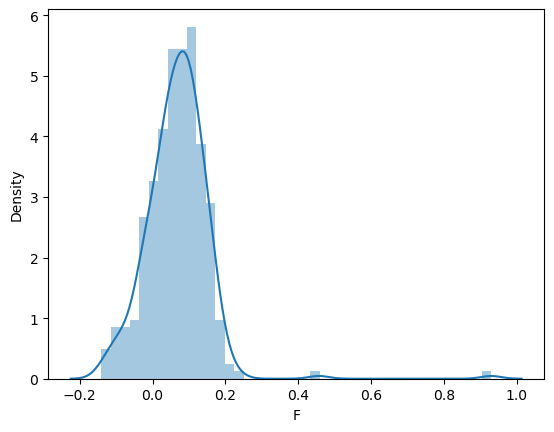

In [432]:
sns.distplot(pd.read_csv("../plink_het.het", sep = "\t").sort_values("F")["F"])

In [420]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../shapeit_phase/all.phased_tagged.vcf.gz \
    --maf 0.05 --max-missing 1.0 \
    --thin 10000 --remove-indels \
    --recode --out ../plink_pca_input

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../shapeit_phase/all.phased_tagged.vcf.gz
	--maf 0.05
	--thin 10000
	--max-missing 1
	--out ../plink_pca_input
	--recode
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 143 out of 143 Individuals
Outputting VCF file...
After filtering, kept 27047 out of a possible 6177365 Sites
Run Time = 117.00 seconds


In [421]:
task = "plink2_pca"
mem = "256"
cpus = "20"
infile = "../plink_pca_input.recode.vcf"
outpath = "../plink_pca"
prefix = "pca_full"
maf = str(0.05)
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     infile + " " + outpath + " " + prefix + " " + maf], shell=True)

Submitted batch job 8055606


sbatch: slurm_job_submit: No account set, using default acct: open


CompletedProcess(args=['sbatch --mem=256g --ntasks=20 ../plink2_pca.sh ../plink_pca_input.recode.vcf ../plink_pca pca_full 0.05'], returncode=0)

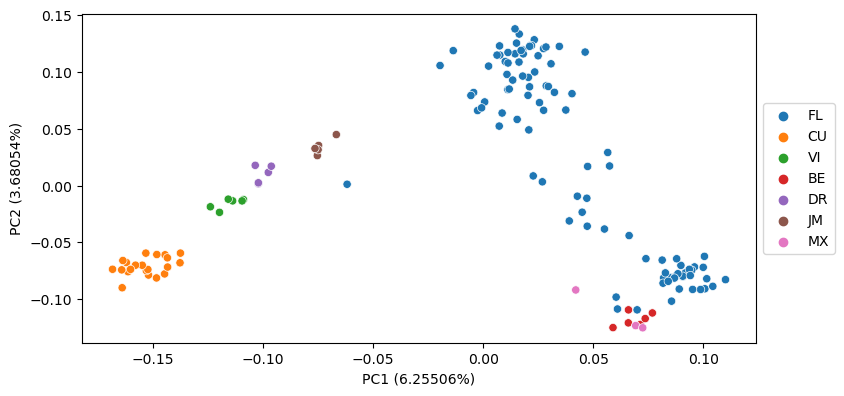

In [4]:
import seaborn as sns
from matplotlib import rcParams
eigenvar = pd.read_csv("../plink_pca/pca_full.eigenval", sep = "\t", header = None)

# figure size in inches
rcParams['figure.figsize'] = 8.7,4.27

pca = pd.read_csv("../plink_pca/pca_full.eigenvec", sep = "\t")

metadata = pd.read_csv("../popmap.txt", sep = "\t")
metadata.columns = ["#IID", "Region"]
pca = pca.merge(metadata, how = "left", on = "#IID")
sns.scatterplot(data = pca, x = "PC1", y = "PC2", hue = "Region")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("PC1 (" + str(eigenvar[0][0]) + "%)")
plt.ylabel("PC2 (" + str(eigenvar[0][1]) + "%)")
plt.savefig("../WGS_popgen.png", dpi = 300, bbox_inches='tight')

In [5]:
psu = pd.read_csv("../2023-03-21_psuMeta.csv")
psu = psu[["clonal_id_correct", "totSym", "Nursery", "ed50"]]
psu.columns = ['Best Galaxy Match Clonal ID', "totSym", 'Fixed_Nursery', "Fixed_ED50"]
metadata = pd.read_csv("../filtered_DARPA_metadata_fixed.csv")
metadata.columns = ['Questionable?', 'SampleProviderTubeID', '#IID', 'Galaxy Name',
       'Best Galaxy Match User ID', 'Coral Mlg Clonal ID',
       'Best Galaxy Match Clonal ID', 'Original Collection Site',
       'Best Galaxy Match Reef Name', 'Best Galaxy Match KING Coefficient',
       'ED50', 'Fixed_ED50', 'Nursery', 'Fixed_Nursery', 'CBASS_DATE',
       'Fixed_CBASS_DATE', 'CBASS_POS', 'Fixed_CBASS_POS', 'DNA Plate',
       'ng/ul', 'Instrument', 'Genet', 'Latitude', 'Longitude', 'Region',
       'SampleProvider', 'Spawning', 'Notes', 'Additional Notes', 'SeqType',
       'Best Galaxy Match', 'Huck_Sub_ID', 'DNA Plate Well', 'Database ID']
metadata = metadata.merge(psu, on = ['Best Galaxy Match Clonal ID', 'Fixed_Nursery', "Fixed_ED50"], how = "left")
metadata["GenotypingBatch"] = "nick"
metadata.loc[metadata["#IID"].str.contains("kenkel"), "GenotypingBatch"] = "kenkel"
metadata.loc[metadata["#IID"].str.contains("SRR"), "GenotypingBatch"] = "sheila"
pca = pca.merge(metadata[["#IID", 'Fixed_Nursery', "Fixed_ED50", "SampleProvider", 
                          "totSym", "GenotypingBatch", "Fixed_CBASS_POS", "Fixed_CBASS_DATE"]], how = "left", on = "#IID")
#pca.loc[~pca["#IID"].isin(metadata["#IID"][metadata["Questionable?"] == "No"].tolist()), "Fixed_ED50"] = "NA"
pca["GenotypingBatch"] = pca["GenotypingBatch"].fillna("NONE")
pca["Fixed_Nursery"] = pca["Fixed_Nursery"].fillna("NONE")
pca["Fixed_ED50"] = pca["Fixed_ED50"].fillna("NA")
pca["totSym"] = pca["totSym"].fillna("NA")
pca["Fixed_CBASS_POS"] = pca["Fixed_CBASS_POS"].fillna("NONE")
pca["Fixed_CBASS_DATE"] = pca["Fixed_CBASS_DATE"].fillna("NONE")

In [6]:
pca

,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region,Fixed_Nursery,Fixed_ED50,SampleProvider,totSym,GenotypingBatch,Fixed_CBASS_POS,Fixed_CBASS_DATE
0,A22036,0.010823,0.097765,-0.064663,0.013539,-0.008738,-0.003072,-0.056132,0.012259,-0.006441,-0.075026,FL,RRT,36.487215,Rich,NA,nick,topRight,6/14/2022
1,A22037,0.007576,0.114735,-0.036419,-0.058584,0.008932,-0.031010,-0.029616,0.036704,-0.041480,-0.176781,FL,RRT,36.694427,Rich,0.004522,nick,centerLeft,6/14/2022
2,A22042,0.085290,-0.080855,-0.047277,-0.004994,-0.022894,-0.029818,0.026263,0.027372,-0.026738,-0.025033,FL,RRT,36.547201,Rich,0.01154,nick,topLeft,6/14/2022
3,A22048,0.023416,0.099888,-0.027604,-0.047102,0.123665,-0.093236,0.032085,-0.041232,0.032461,-0.030801,FL,RRT,36.513106,Rich,NA,nick,bottomCenter,6/14/2022
4,A22054,0.090689,-0.080100,-0.023552,0.010765,-0.036457,-0.066692,0.056132,0.033879,0.008692,0.032745,FL,RRT,36.821715,Rich,0.047105,nick,centerRight,6/14/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,A204,-0.157812,-0.070026,-0.053082,-0.106526,0.039734,-0.021894,0.020168,0.005928,-0.058422,0.016127,CU,NONE,NA,NaN,NA,nick,NONE,NONE
139,M145,-0.148284,-0.081235,-0.051530,-0.101957,-0.085876,-0.009475,-0.016972,-0.043326,-0.000408,0.001987,CU,NONE,NA,NaN,NA,nick,NONE,NONE
140,A207,-0.160049,-0.073687,-0.093263,-0.106710,-0.038202,-0.013648,-0.006140,0.037825,-0.051632,0.019622,CU,NONE,NA,NaN,NA,nick,NONE,NONE
141,A32,-0.143237,-0.071669,-0.053900,-0.073842,-0.098411,-0.016344,0.026971,-0.020748,0.019321,-0.028748,CU,NONE,NA,NaN,NA,nick,NONE,NONE


In [468]:
pca[["#IID", "Fixed_ED50"]].set_index("#IID").to_csv("../phenotypes.pheno", sep = "\t")
pca[["#IID", "Fixed_Nursery",
     "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]].set_index("#IID").to_csv("../covar.cov", sep = "\t")

In [408]:
metadata = pd.read_csv("../filtered_DARPA_metadata_fixed.csv")

In [368]:
psumeta["genetNumber"] = psumeta["genetNumber"].astype(object)

In [369]:
metadata = metadata[["Novogene_ID", "Best Galaxy Match Clonal ID"]]
metadata.columns = ["Novogene_ID", "Coral Mlg Clonal ID"]

In [371]:
meta = metadata.merge(psumeta, how = "left", on = ["Coral Mlg Clonal ID"])

In [365]:
psumeta.sort_values("ED50")

,genetNumber,ED50,Coral Mlg Clonal ID,CBASS Date,Nursery
17,165,35.303972,HG0544,6/16/2022,CRF
4,145,35.581740,HG1682,6/16/2022,CRF
16,12,35.882564,HG0543,6/8/2022,UM
14,37,35.919775,HG0548,6/14/2022,RRT
81,5,35.934332,HG1459,6/8/2022,UM
...,...,...,...,...,...
21,103,37.267633,HG0837,6/15/2022,CRF
79,157,37.361438,HG1092,6/16/2022,CRF
9,155,37.399591,HG0205,6/16/2022,CRF
80,129,37.419379,HG1042,6/16/2022,CRF


In [364]:
psumeta.drop_duplicates("Coral Mlg Clonal ID")

,genetNumber,ED50,Coral Mlg Clonal ID,CBASS Date,Nursery
0,6,36.231136,NaN,6/8/2022,UM
1,149,36.719766,HG0809,6/16/2022,CRF
2,88,36.534742,HG1185,6/15/2022,CRF
3,104,36.614027,HG1640,6/15/2022,CRF
4,145,35.581740,HG1682,6/16/2022,CRF
...,...,...,...,...,...
77,82,36.319721,HG1204,6/14/2022,RRT
78,95,36.652964,HG0781,6/15/2022,CRF
79,157,37.361438,HG1092,6/16/2022,CRF
80,129,37.419379,HG1042,6/16/2022,CRF


In [382]:
microarrayeds[microarrayeds["ED50"].notna()][microarrayeds["Affymetrix ID"].isin(imputedsamplelist[0])]

/tmp/ipykernel_1380764/4203037087.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  microarrayeds[microarrayeds["ED50"].notna()][microarrayeds["Affymetrix ID"].isin(imputedsamplelist[0])]


,Affymetrix ID,Coral Mlg Clonal ID,genetNumber,ED50,Nursery
553,121060641_(Axiom_AcropSNP)_M13.CEL,HG0937,34.0,36.234589,UM


In [380]:
extrasample = psumeta[psumeta["genetNumber"] == 34].reset_index(drop=True)

In [384]:
extrasample["Novogene_ID"] = np.nan
extrasample["Novogene_ID"][0] = "121060641_(Axiom_AcropSNP)_M13.CEL"

/tmp/ipykernel_1380764/2248118120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extrasample["Novogene_ID"][0] = "121060641_(Axiom_AcropSNP)_M13.CEL"


In [385]:
extrasample

,genetNumber,ED50,Coral Mlg Clonal ID,CBASS Date,Nursery,Novogene_ID
0,34,36.234589,HG0937,6/8/2022,UM,121060641_(Axiom_AcropSNP)_M13.CEL


In [389]:
meta = pd.concat([meta, extrasample]).reset_index(drop=True)

In [395]:
pca = pca.merge(meta, how = "left", on = "#IID")

In [393]:
meta.columns = ['#IID', 'Coral Mlg Clonal ID', 'genetNumber', 'ED50',
       'CBASS Date', 'Nursery']

,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region
0,A22036,0.060631,0.014701,-0.039403,0.044370,-0.052126,-0.036071,0.050654,0.046977,-0.015027,-0.033810,FL
1,A22037,0.058427,0.034781,-0.036416,-0.016898,-0.033529,0.036504,-0.011404,0.110529,-0.058630,-0.115588,FL
2,A22042,-0.038363,0.093844,-0.002025,0.004362,-0.003925,0.001041,-0.019993,-0.009464,-0.007445,-0.017743,FL
3,A22048,0.062843,0.014943,-0.069177,0.022324,-0.016361,0.085997,-0.027057,0.047037,-0.014423,-0.040976,FL
4,A22054,-0.038509,0.088020,-0.020616,0.044230,-0.012619,-0.000176,-0.046832,-0.083485,-0.013422,-0.043553,FL
...,...,...,...,...,...,...,...,...,...,...,...,...
311,a550962-4420485-051222-881_C05.CEL,-0.039778,-0.019904,-0.001971,-0.115370,0.022224,0.104046,0.164640,-0.120349,-0.000833,-0.015978,NaN
312,a550962-4420485-051222-881_C21.CEL,-0.028301,-0.012267,0.008336,-0.118194,0.091509,-0.064487,-0.087207,-0.028468,-0.078590,0.062373,NaN
313,a550962-4448480-110623-112_G21.CEL,-0.032541,-0.015895,-0.020641,-0.014929,0.052414,0.022103,0.105030,0.032577,-0.078365,0.034559,NaN
314,a550962-4448480-110623-112_K19.CEL,-0.043512,0.002334,-0.030852,-0.107070,0.063999,-0.014271,-0.128025,-0.088342,-0.230775,0.089257,NaN


In [436]:
pca[pca["PC1"] < -0.05][pca["Region"] == "FL"]

/tmp/ipykernel_3618205/1199293680.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pca[pca["PC1"] < -0.05][pca["Region"] == "FL"]


,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region
129,ML-WDR4_kenkel,-0.06175,0.001152,0.095769,0.07499,-0.083111,-0.015123,-0.032314,-0.06348,-0.0247,0.030411,FL


In [397]:
%%bash
source ~/.bashrc
conda activate bcftools_call
bcftools query -l ../calls/gwas_dataset.vcf.gz \
    > ../final_gwas_sample.list

In [396]:
pca

,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region,Coral Mlg Clonal ID,genetNumber,ED50,CBASS Date,Nursery
0,A22036,0.060631,0.014701,-0.039403,0.044370,-0.052126,-0.036071,0.050654,0.046977,-0.015027,-0.033810,FL,HG1196,63,36.362286,6/14/2022,RRT
1,A22037,0.058427,0.034781,-0.036416,-0.016898,-0.033529,0.036504,-0.011404,0.110529,-0.058630,-0.115588,FL,HG0931,39,36.694427,6/14/2022,RRT
2,A22042,-0.038363,0.093844,-0.002025,0.004362,-0.003925,0.001041,-0.019993,-0.009464,-0.007445,-0.017743,FL,HG0925,44,36.547201,6/14/2022,RRT
3,A22048,0.062843,0.014943,-0.069177,0.022324,-0.016361,0.085997,-0.027057,0.047037,-0.014423,-0.040976,FL,HG0544,165,35.303972,6/16/2022,CRF
4,A22054,-0.038509,0.088020,-0.020616,0.044230,-0.012619,-0.000176,-0.046832,-0.083485,-0.013422,-0.043553,FL,HG0928,56,36.821715,6/14/2022,RRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,a550962-4420485-051222-881_C05.CEL,-0.039778,-0.019904,-0.001971,-0.115370,0.022224,0.104046,0.164640,-0.120349,-0.000833,-0.015978,NaN,NaN,NaN,NaN,NaN,NaN
312,a550962-4420485-051222-881_C21.CEL,-0.028301,-0.012267,0.008336,-0.118194,0.091509,-0.064487,-0.087207,-0.028468,-0.078590,0.062373,NaN,NaN,NaN,NaN,NaN,NaN
313,a550962-4448480-110623-112_G21.CEL,-0.032541,-0.015895,-0.020641,-0.014929,0.052414,0.022103,0.105030,0.032577,-0.078365,0.034559,NaN,NaN,NaN,NaN,NaN,NaN
314,a550962-4448480-110623-112_K19.CEL,-0.043512,0.002334,-0.030852,-0.107070,0.063999,-0.014271,-0.128025,-0.088342,-0.230775,0.089257,NaN,NaN,NaN,NaN,NaN,NaN


In [399]:
pca[pca["ED50"].notna()]

,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region,Coral Mlg Clonal ID,genetNumber,ED50,CBASS Date,Nursery
0,A22036,0.060631,0.014701,-0.039403,0.044370,-0.052126,-0.036071,0.050654,0.046977,-0.015027,-0.033810,FL,HG1196,63,36.362286,6/14/2022,RRT
1,A22037,0.058427,0.034781,-0.036416,-0.016898,-0.033529,0.036504,-0.011404,0.110529,-0.058630,-0.115588,FL,HG0931,39,36.694427,6/14/2022,RRT
2,A22042,-0.038363,0.093844,-0.002025,0.004362,-0.003925,0.001041,-0.019993,-0.009464,-0.007445,-0.017743,FL,HG0925,44,36.547201,6/14/2022,RRT
3,A22048,0.062843,0.014943,-0.069177,0.022324,-0.016361,0.085997,-0.027057,0.047037,-0.014423,-0.040976,FL,HG0544,165,35.303972,6/16/2022,CRF
4,A22054,-0.038509,0.088020,-0.020616,0.044230,-0.012619,-0.000176,-0.046832,-0.083485,-0.013422,-0.043553,FL,HG0928,56,36.821715,6/14/2022,RRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Apal-090_kenkel,0.057917,0.002478,-0.109468,-0.066120,-0.006116,0.002421,0.002693,-0.061115,0.083441,-0.002604,FL,HG1734,133,37.100162,6/16/2022,CRF
128,ML-WDR2_kenkel,0.029995,0.045002,-0.048287,0.000182,0.024453,0.026620,0.059943,0.022669,0.012557,0.062020,FL,HG1092,157,37.361438,6/16/2022,CRF
129,ML-WDR4_kenkel,0.053695,0.037294,-0.002682,-0.025546,0.045154,0.008864,-0.038533,-0.034055,0.056154,0.026366,FL,HG1042,129,37.419379,6/16/2022,CRF
142,A22089,0.073938,0.004033,-0.069359,0.030510,-0.072316,-0.049451,0.005817,0.112213,-0.097070,-0.012779,FL,HG1207,91,36.371952,6/15/2022,CRF


In [403]:
pca["Nursery"] = pca["Nursery"].fillna("NONE")
pca["ED50"] = pca["ED50"].fillna("NA")

In [409]:
metadata = pd.read_csv("../filtered_DARPA_metadata_fixed.csv")

In [412]:
metadata["Novogene_ID"][metadata["Questionable?"] == "No"].tolist()

['A21999',
 'A22001',
 'A22002',
 'A22003',
 'A22006',
 'A22007',
 'A22036',
 'A22037',
 'A22042',
 'A22048',
 'A22051',
 'A22054',
 'A22055',
 'A22061',
 'A22064',
 'A22065',
 'A22066',
 'A22067',
 'A22068',
 'A22071',
 'A22073',
 'A22076',
 'A22077',
 'A22079',
 'A22080',
 'A22081',
 'A22084',
 'A22085',
 'A22086',
 'A22087',
 'A22089',
 'A22090',
 'A22091',
 'A22094',
 'A22095',
 'A22096',
 'A22097',
 'A22098',
 'A22103',
 'A22116',
 'A22120',
 'A22123',
 'A22124',
 'A22125',
 'A22126',
 'A22129',
 'A22130',
 'A22132',
 'A22133',
 'A22135',
 'A22137',
 'A22139',
 'A22142',
 'A22143',
 'A22144',
 'A22146',
 'A22149',
 'A22150',
 'A22151',
 'A22152',
 'A22158',
 'A22159',
 'A22160',
 'A22165',
 'A22166',
 'A22168',
 'A22224',
 'A22225',
 'A22226',
 'A22230',
 'A22231',
 'A22233',
 'A22234',
 'A22236',
 'A22237',
 'A22239',
 'A22240',
 'A22241',
 'A22242',
 'A22243',
 'A22249',
 'A13414',
 'A20148',
 'A20151',
 'A20153',
 'A20154',
 'A20155',
 'A20156',
 'AP8_kenkel',
 'AP14_kenkel',
 

In [415]:
pca.loc[~pca["#IID"].isin(metadata["Novogene_ID"][metadata["Questionable?"] == "No"].tolist()), "ED50"] = "NA"

In [416]:
pca[["#IID", "ED50"]].set_index("#IID").to_csv("../phenotypes.pheno", sep = "\t")

In [417]:
pca[pca["ED50"] != "NA"]

,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region,Coral Mlg Clonal ID,genetNumber,ED50,CBASS Date,Nursery
0,A22036,0.060631,0.014701,-0.039403,0.044370,-0.052126,-0.036071,0.050654,0.046977,-0.015027,-0.033810,FL,HG1196,63,36.362286,6/14/2022,RRT
1,A22037,0.058427,0.034781,-0.036416,-0.016898,-0.033529,0.036504,-0.011404,0.110529,-0.058630,-0.115588,FL,HG0931,39,36.694427,6/14/2022,RRT
2,A22042,-0.038363,0.093844,-0.002025,0.004362,-0.003925,0.001041,-0.019993,-0.009464,-0.007445,-0.017743,FL,HG0925,44,36.547201,6/14/2022,RRT
3,A22048,0.062843,0.014943,-0.069177,0.022324,-0.016361,0.085997,-0.027057,0.047037,-0.014423,-0.040976,FL,HG0544,165,35.303972,6/16/2022,CRF
4,A22054,-0.038509,0.088020,-0.020616,0.044230,-0.012619,-0.000176,-0.046832,-0.083485,-0.013422,-0.043553,FL,HG0928,56,36.821715,6/14/2022,RRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Apal-047_kenkel,-0.061450,0.096239,-0.034712,0.051404,-0.014848,-0.032741,-0.081387,-0.017814,0.068069,0.035165,FL,HG1738,121,37.17464,6/15/2022,CRF
117,Apal-090_kenkel,0.057917,0.002478,-0.109468,-0.066120,-0.006116,0.002421,0.002693,-0.061115,0.083441,-0.002604,FL,HG1734,133,37.100162,6/16/2022,CRF
128,ML-WDR2_kenkel,0.029995,0.045002,-0.048287,0.000182,0.024453,0.026620,0.059943,0.022669,0.012557,0.062020,FL,HG1092,157,37.361438,6/16/2022,CRF
129,ML-WDR4_kenkel,0.053695,0.037294,-0.002682,-0.025546,0.045154,0.008864,-0.038533,-0.034055,0.056154,0.026366,FL,HG1042,129,37.419379,6/16/2022,CRF


In [418]:
pca[["#IID", "Nursery",
     "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]].set_index("#IID").to_csv("../covar.cov", sep = "\t")

In [407]:
metadata

,Novogene_ID,Coral Mlg Clonal ID
0,A21999,HG1459
1,A22001,HG0004
2,A22002,HG1459
3,A22003,HG1459
4,A22006,HG1459
...,...,...
178,A11,HG0741
179,A148,HG0757
180,A201,HG0128
181,A204,HG0751


In [400]:
pca

,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region,Coral Mlg Clonal ID,genetNumber,ED50,CBASS Date,Nursery
0,A22036,0.060631,0.014701,-0.039403,0.044370,-0.052126,-0.036071,0.050654,0.046977,-0.015027,-0.033810,FL,HG1196,63,36.362286,6/14/2022,RRT
1,A22037,0.058427,0.034781,-0.036416,-0.016898,-0.033529,0.036504,-0.011404,0.110529,-0.058630,-0.115588,FL,HG0931,39,36.694427,6/14/2022,RRT
2,A22042,-0.038363,0.093844,-0.002025,0.004362,-0.003925,0.001041,-0.019993,-0.009464,-0.007445,-0.017743,FL,HG0925,44,36.547201,6/14/2022,RRT
3,A22048,0.062843,0.014943,-0.069177,0.022324,-0.016361,0.085997,-0.027057,0.047037,-0.014423,-0.040976,FL,HG0544,165,35.303972,6/16/2022,CRF
4,A22054,-0.038509,0.088020,-0.020616,0.044230,-0.012619,-0.000176,-0.046832,-0.083485,-0.013422,-0.043553,FL,HG0928,56,36.821715,6/14/2022,RRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,a550962-4420485-051222-881_C05.CEL,-0.039778,-0.019904,-0.001971,-0.115370,0.022224,0.104046,0.164640,-0.120349,-0.000833,-0.015978,NaN,NaN,NaN,NaN,NaN,NaN
312,a550962-4420485-051222-881_C21.CEL,-0.028301,-0.012267,0.008336,-0.118194,0.091509,-0.064487,-0.087207,-0.028468,-0.078590,0.062373,NaN,NaN,NaN,NaN,NaN,NaN
313,a550962-4448480-110623-112_G21.CEL,-0.032541,-0.015895,-0.020641,-0.014929,0.052414,0.022103,0.105030,0.032577,-0.078365,0.034559,NaN,NaN,NaN,NaN,NaN,NaN
314,a550962-4448480-110623-112_K19.CEL,-0.043512,0.002334,-0.030852,-0.107070,0.063999,-0.014271,-0.128025,-0.088342,-0.230775,0.089257,NaN,NaN,NaN,NaN,NaN,NaN


In [419]:
pca[pca]

,#IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Region,Coral Mlg Clonal ID,genetNumber,ED50,CBASS Date,Nursery
0,A22036,0.060631,0.014701,-0.039403,0.044370,-0.052126,-0.036071,0.050654,0.046977,-0.015027,-0.033810,FL,HG1196,63,36.362286,6/14/2022,RRT
1,A22037,0.058427,0.034781,-0.036416,-0.016898,-0.033529,0.036504,-0.011404,0.110529,-0.058630,-0.115588,FL,HG0931,39,36.694427,6/14/2022,RRT
2,A22042,-0.038363,0.093844,-0.002025,0.004362,-0.003925,0.001041,-0.019993,-0.009464,-0.007445,-0.017743,FL,HG0925,44,36.547201,6/14/2022,RRT
3,A22048,0.062843,0.014943,-0.069177,0.022324,-0.016361,0.085997,-0.027057,0.047037,-0.014423,-0.040976,FL,HG0544,165,35.303972,6/16/2022,CRF
4,A22054,-0.038509,0.088020,-0.020616,0.044230,-0.012619,-0.000176,-0.046832,-0.083485,-0.013422,-0.043553,FL,HG0928,56,36.821715,6/14/2022,RRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,a550962-4420485-051222-881_C05.CEL,-0.039778,-0.019904,-0.001971,-0.115370,0.022224,0.104046,0.164640,-0.120349,-0.000833,-0.015978,NaN,NaN,NaN,NA,NaN,NONE
312,a550962-4420485-051222-881_C21.CEL,-0.028301,-0.012267,0.008336,-0.118194,0.091509,-0.064487,-0.087207,-0.028468,-0.078590,0.062373,NaN,NaN,NaN,NA,NaN,NONE
313,a550962-4448480-110623-112_G21.CEL,-0.032541,-0.015895,-0.020641,-0.014929,0.052414,0.022103,0.105030,0.032577,-0.078365,0.034559,NaN,NaN,NaN,NA,NaN,NONE
314,a550962-4448480-110623-112_K19.CEL,-0.043512,0.002334,-0.030852,-0.107070,0.063999,-0.014271,-0.128025,-0.088342,-0.230775,0.089257,NaN,NaN,NaN,NA,NaN,NONE


Based on indv het and pop structure, we'll drop AP55_kenkel and SRR7235983 as they both seem to have very low het and ML-WDR4_kenkel due to pop structure as it looks like it's totally out on its own with Jamaican genets. SRR7235983 was the genet used to assemble the reference genome so perhaps this is an artifact but it's hard to say so we'll drop it.

In [604]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools view --samples ^AP55_kenkel,SRR7235983 \
    ../shapeit_phase/all.phased_tagged.vcf.gz \
    | bcftools view --force-samples --samples-file ../FL.txt \
    -e 'COUNT(GT="AA")=N_SAMPLES || COUNT(GT="RR")=N_SAMPLES' \
    | bcftools annotate --remove ^"INFO/CM" | bcftools +fill-tags -- -t all \
    | bcftools view -e 'HWE<0.0001 || ExcHet<0.0001' \
    -Oz -o ../shapeit_phase/FL.phased_tagged_filtered.vcf.gz
tabix ../shapeit_phase/FL.phased_tagged_filtered.vcf.gz
bcftools view ../shapeit_phase/FL.phased_tagged_filtered.vcf.gz | grep -v "^#" | wc -l

Warn: subset called for sample that does not exist in header: "A21999"... skipping
Warn: subset called for sample that does not exist in header: "A22001"... skipping
Warn: subset called for sample that does not exist in header: "A22002"... skipping
Warn: subset called for sample that does not exist in header: "A22003"... skipping
Warn: subset called for sample that does not exist in header: "A22006"... skipping
Warn: subset called for sample that does not exist in header: "A22007"... skipping
Warn: subset called for sample that does not exist in header: "A22051"... skipping
Warn: subset called for sample that does not exist in header: "A22061"... skipping
Warn: subset called for sample that does not exist in header: "A22069"... skipping
Warn: subset called for sample that does not exist in header: "A22071"... skipping
Warn: subset called for sample that does not exist in header: "A22161"... skipping
Warn: subset called for sample that does not exist in header: "A22168"... skipping
Warn

5631305


In [194]:
psu = pd.read_csv("../2023-03-21_psuMeta.csv")
psu = psu[["clonal_id_correct", "totSym", "Nursery", "ed50"]]
psu.columns = ['Best Galaxy Match Clonal ID', "totSym", 'Fixed_Nursery', "Fixed_ED50"]

In [196]:
metadata = metadata.merge(psu, on = ['Best Galaxy Match Clonal ID', 'Fixed_Nursery', "Fixed_ED50"], how = "left")

In [197]:
metadata["GenotypingBatch"] = "nick"
metadata.loc[metadata["#IID"].str.contains("kenkel"), "GenotypingBatch"] = "kenkel"
metadata.loc[metadata["#IID"].str.contains("SRR"), "GenotypingBatch"] = "sheila"

In [198]:
pca = pca.merge(metadata[["#IID", 'Fixed_Nursery', "Fixed_ED50", "SampleProvider", 
                          "totSym", "GenotypingBatch", "Fixed_CBASS_POS", "Fixed_CBASS_DATE"]], how = "left", on = "#IID")

In [199]:
pca["GenotypingBatch"] = pca["GenotypingBatch"].fillna("NONE")
pca["Fixed_Nursery"] = pca["Fixed_Nursery"].fillna("NONE")
pca["Fixed_ED50"] = pca["Fixed_ED50"].fillna("NA")
pca["totSym"] = pca["totSym"].fillna("NA")
pca["Fixed_CBASS_POS"] = pca["Fixed_CBASS_POS"].fillna("NONE")
pca["Fixed_CBASS_DATE"] = pca["Fixed_CBASS_DATE"].fillna("NONE")

In [200]:
pca[["#IID", "Fixed_ED50"]].set_index("#IID").to_csv("../phenotypes.pheno", sep = "\t")
pca[["#IID", "Fixed_Nursery",
     "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]].set_index("#IID").to_csv("../covar.cov", sep = "\t")